Module 11 Challenge_Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

# Step 1: Visit the Website

In [2]:
# Opening a chrome window using Splinter
browser = Browser('chrome')

In [3]:
# Set a Url to visit
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Step 2: Scrape the Table

In [4]:
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [5]:
table = soup.find('table', class_="table")
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

# Step 3: Store the Data

In [6]:
headings = []
data = []

# Extract table headers
for th in table.find_all('th'):
    headings.append(th.text.strip())

# Extract table data
for tr in table.find_all('tr'):
    row_data = []
    for td in tr.find_all('td'):
        row_data.append(td.text.strip())
    if row_data:
        data.append(row_data)

# Create DataFrame
table_pd = pd.DataFrame(data, columns=headings)

# Display DataFrame
table_pd.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [7]:
# # Read in HTML tables into a DataFrame
# df = pd.read_html(url)
# # Select the table
# table_pd = df[0]
# table_pd

# Step 4: Prepare Data for Analysis

In [8]:
# Examine data type of each column
table_pd.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
table_pd['terrestrial_date'] = pd.to_datetime(table_pd['terrestrial_date'])
# Change data types 
cols_to_convert = ['id', 'sol', 'ls','month', 'min_temp', 'pressure']
table_pd[cols_to_convert] = table_pd[cols_to_convert].apply(pd.to_numeric)
table_pd.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
# Drop rows with NaN values
df = table_pd.dropna()
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


# Step 5: Analyze the Data

In [11]:
# 1. How many months exist on Mars?
month = df['month'].value_counts().sort_index()
month

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [12]:
# 2. How many Martian days' worth of data are there?
Martian_days = df['terrestrial_date'].nunique()
Martian_days

1867

In [13]:
# 3. What is the average low temperature by month?
average_low_temp = df.groupby('month')['min_temp'].mean()
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

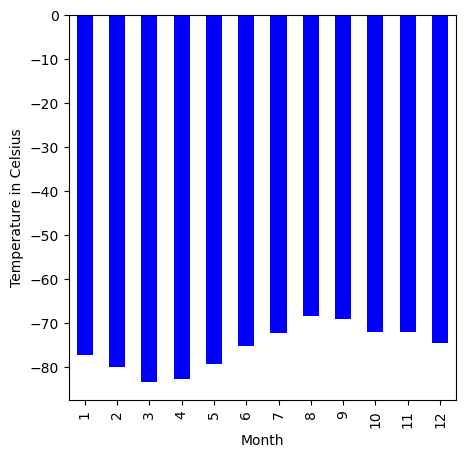

In [14]:
# Plot the average temperature by month
plt.figure(figsize = (5,5), dpi = 100)
average_low_temp.plot(kind='bar', color = 'blue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

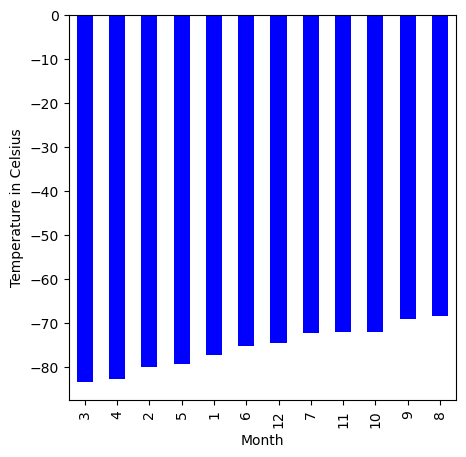

In [15]:
# Identify the coldest and hottest months in Curiosity's location
plt.figure(figsize = (5,5), dpi = 100)
average_low_temp.sort_values().plot(kind='bar', color = 'blue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

In [16]:
# 4. Average pressure by Martian month
average_pressure = df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

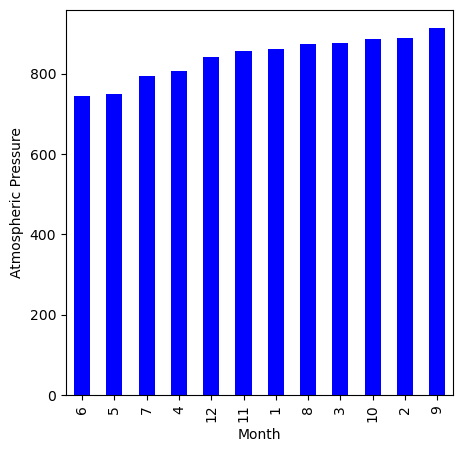

In [17]:
# Plot the average pressure by month
plt.figure(figsize = (5,5), dpi = 100)
average_pressure.sort_values().plot(kind='bar', color = 'blue')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

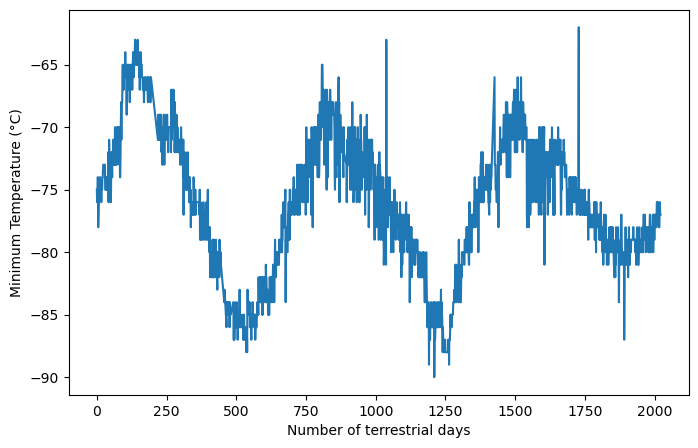

In [18]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Sort the DataFrame by 'terrestrial_date'
df_sorted = df.sort_values('terrestrial_date')

# Calculate the difference in days from the minimum date
df_sorted['terr_days'] = (df_sorted['terrestrial_date'] - df_sorted['terrestrial_date'].min()).dt.days

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_sorted['terr_days'], df_sorted['min_temp'], linestyle='-')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature (°C)')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

In [19]:
table_pd.to_csv('Mars Information.csv', index = False)

In [20]:
browser.quit()